In [217]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
import plotly.express as px

plt.style.use('ggplot')
pd.options.display.width = 0

sns.set_style("whitegrid", {"grid.color": "#cbd2d9"})

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.facecolor'] = '#eeede9'
mpl.rcParams['figure.facecolor'] = '#eeede9'

rc('font',**{'family':'sans-serif','sans-serif':['DM Sans']})
rc('text', usetex=True)

In [38]:
freq_read_df = pd.read_csv('reading-data/clean/frequency-of-read.csv')

In [40]:
freq_read_df

,age,frequencies,male_read,female_read
0,6 - 14,Daily,1348589,1472791
1,15 - 24,Daily,2946721,3170938
2,25 - 39,Daily,3938514,4384274
3,40 - 59,Daily,3712558,3880933
4,60 and over,Daily,966011,992115
5,6 - 14,4 - 6 days/week,1167615,1055550
6,15 - 24,4 - 6 days/week,702721,702663
7,25 - 39,4 - 6 days/week,809029,890529
8,40 - 59,4 - 6 days/week,906869,952481
9,60 and over,4 - 6 days/week,259160,288875


In [41]:
melted_df = pd.melt(freq_read_df, id_vars=['age', 'frequencies'], 
                    value_vars=['male_read', 'female_read'], 
                    var_name='gender', value_name='read_amount')

# Replace 'male_read' and 'female_read' with 'Male' and 'Female' in the 'gender' column
melted_df['gender'] = melted_df['gender'].replace({'male_read': 'Male', 'female_read': 'Female'})

In [42]:
melted_df.head()

,age,frequencies,gender,read_amount
0,6 - 14,Daily,Male,1348589
1,15 - 24,Daily,Male,2946721
2,25 - 39,Daily,Male,3938514
3,40 - 59,Daily,Male,3712558
4,60 and over,Daily,Male,966011


In [7]:
melted_df.fillna(method='ffill', inplace=True)

/tmp/ipykernel_40656/1173243499.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  melted_df.fillna(method='ffill', inplace=True)


In [293]:
melted_df['age'] = melted_df['age'].astype('category')
melted_df['frequencies'] = melted_df['frequencies'].astype('category')
melted_df['gender'] = melted_df['gender'].astype('category')

In [298]:
melted_df.dtypes

age            category
frequencies      object
gender           object
read_amount       int64
dtype: object

In [104]:
def format_thousands(x, pos):
    if x >= 1000:
        return f'{x / 1000:.0f}k'
    else:
        return int(x)

def autopct_format(pct):
    return f'{pct:.1f}\%'


/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



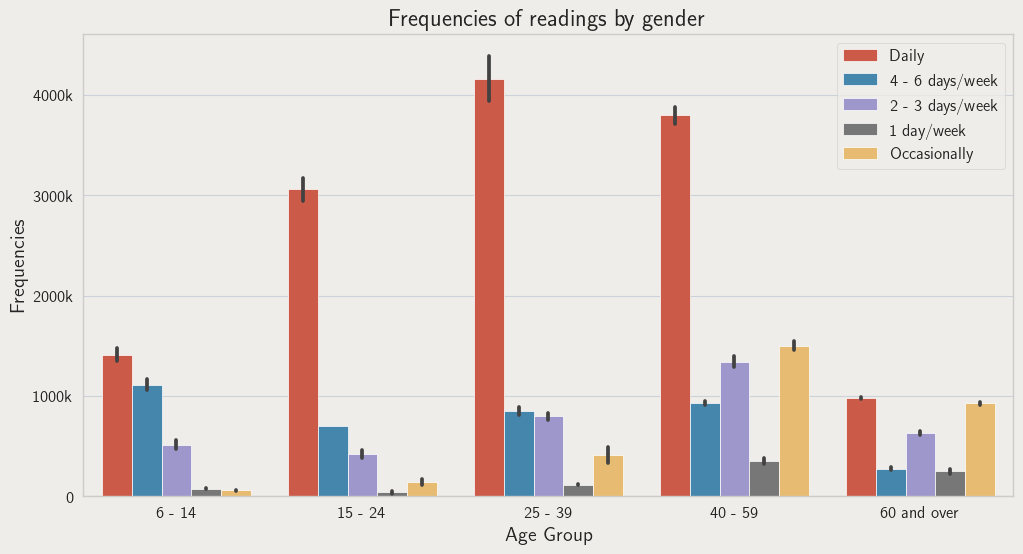

In [283]:
plt.figure(figsize=(12, 6))

sns.barplot(data=melted_df,x='age', y='read_amount', hue='frequencies')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Frequencies')
plt.title('Frequencies of readings by gender')
plt.legend()


# Show the plot
plt.savefig('frequencies.png')

In [20]:
not_read = pd.read_csv('reading-data/clean/not-read.csv')

In [21]:
not_read

,age,reason,amount
0,6 - 14,illiterate,63894.0
1,15 - 24,illiterate,17415.0
2,25 - 39,illiterate,56005.0
3,40 - 59,illiterate,98657.0
4,60 and over,illiterate,215758.0
...,...,...,...
80,6 - 14,unknown,NaN
81,15 - 24,unknown,222.0
82,25 - 39,unknown,1525.0
83,40 - 59,unknown,1831.0


In [23]:
not_read = not_read.fillna(0)

In [24]:
not_read

,age,reason,amount
0,6 - 14,illiterate,63894.0
1,15 - 24,illiterate,17415.0
2,25 - 39,illiterate,56005.0
3,40 - 59,illiterate,98657.0
4,60 and over,illiterate,215758.0
...,...,...,...
80,6 - 14,unknown,0.0
81,15 - 24,unknown,222.0
82,25 - 39,unknown,1525.0
83,40 - 59,unknown,1831.0


In [30]:
groupby_age = not_read.groupby('age')['amount'].sum().reset_index()

In [33]:
custom_sorting = {
    '6 - 14': 1,
    '15 - 24': 2,
    '25 - 39': 3,
    '40 - 59': 4,
    '60 and over': 5
}

groupby_age['custom_sort'] = groupby_age['age'].map(custom_sorting)
groupby_age = groupby_age.sort_values(by='custom_sort')
groupby_age = groupby_age.drop(columns=['custom_sort'])

In [59]:
groupby_age

,age,amount
3,6 - 14,221221.0
0,15 - 24,210859.0
1,25 - 39,495802.0
2,40 - 59,1165801.0
4,60 and over,1186010.0


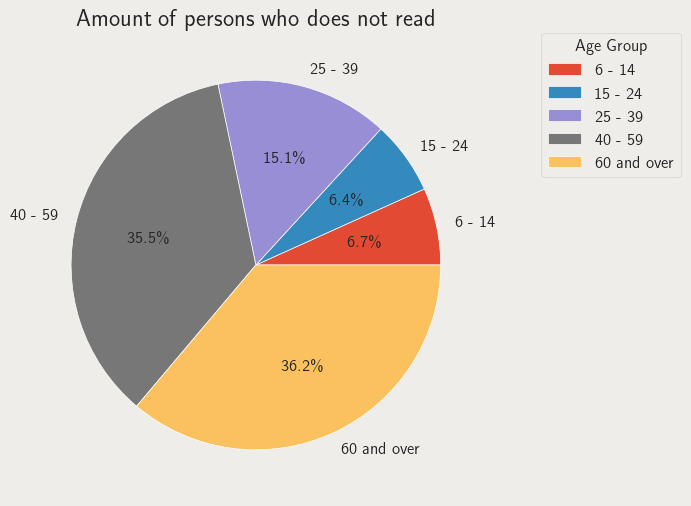

In [254]:
groupby_age.plot(kind='pie', y='amount', labels=groupby_age['age'], autopct=autopct_format)

# Customize the plot

plt.legend(title="Age Group", bbox_to_anchor=(1.1, 1.02), loc='upper left')
plt.title('Amount of persons who does not read')
plt.ylabel('')

fig = plt.gcf()
fig.set_size_inches(10, 6)

# Show the plot
plt.savefig('not-read-pie.png', dpi=300)

In [117]:
# Define the custom mean and standard deviation
custom_mean = 1.5
custom_stddev = 2.0

# Standardize the column
not_read['normalized_amount'] = custom_mean + (not_read['amount'] - not_read['amount'].mean()) * (custom_stddev / not_read['amount'].std())

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

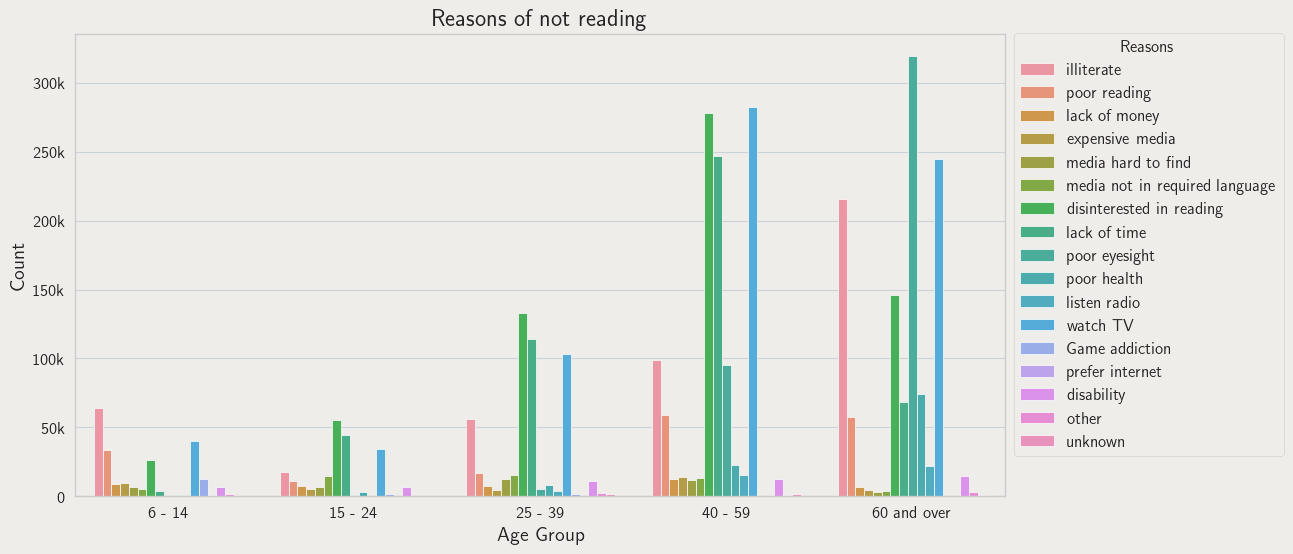

In [184]:
plt.figure(figsize=(12, 6))

sns.barplot(data=not_read,x='age', y='amount', hue='reason')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Reasons of not reading')
plt.legend(title="Reasons", bbox_to_anchor=(1, 1.02), loc='upper left')


# Show the plot
plt.savefig('reasons-full.png', dpi=300, bbox_inches='tight')

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

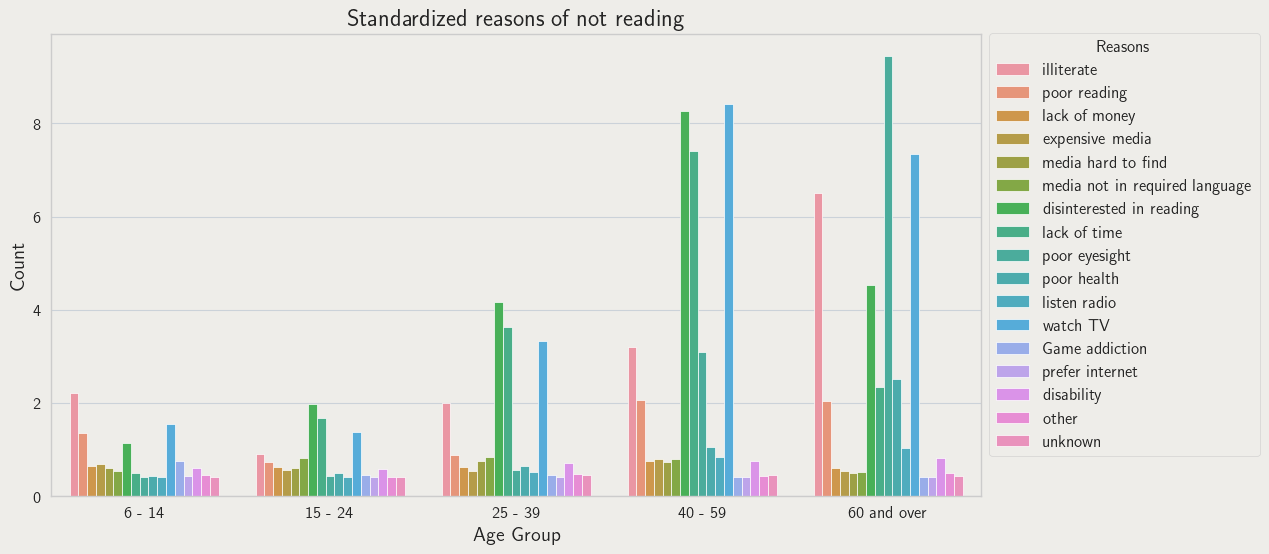

In [178]:
plt.figure(figsize=(12, 6))

sns.barplot(data=not_read,x='age', y='normalized_amount', hue='reason')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Standardized reasons of not reading')
plt.legend(title="Reasons", bbox_to_anchor=(1, 1.02), loc='upper left')

# Show the plot
plt.savefig('reason-standardized.png', dpi=300, bbox_inches='tight')

In [247]:
read_duration = pd.read_csv('reading-duration.csv')

In [248]:
read_duration

,duration,male_read,female_read
0,less than 0:30,6651237,6425371
1,0:30 - 0:59,4043229,4249154
2,1:00 - 1:59,6727502,6963035
3,2:00 - 2:59,3644894,3982882
4,3:00 - 3:59,1765075,1847107
5,4:00 - 4:59,737229,755532
6,5:00 - 5:59,380983,456668
7,6:00 and over,667797,278020
8,unknown,384354,194833


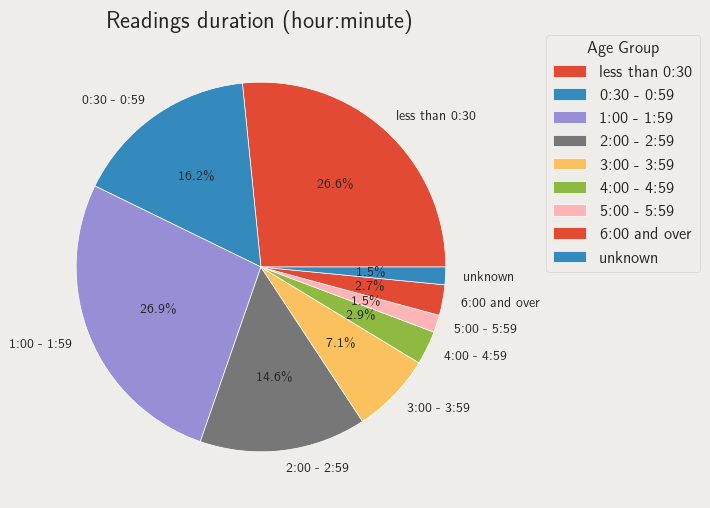

In [259]:
read_duration.plot(kind='pie', y='male_read', labels=read_duration['duration'], autopct=autopct_format,
textprops={'fontsize': 10}
)

# Customize the plot

plt.legend(title="Age Group", bbox_to_anchor=(1.1, 1.02), loc='upper left')
plt.title('Readings duration (hour:minute)')
plt.ylabel('')

fig = plt.gcf()
fig.set_size_inches(10, 6)


In [304]:
melted_df

,age,frequencies,gender,read_amount
0,6 - 14,Daily,Male,1348589
1,15 - 24,Daily,Male,2946721
2,25 - 39,Daily,Male,3938514
3,40 - 59,Daily,Male,3712558
4,60 and over,Daily,Male,966011
5,6 - 14,4 - 6 days/week,Male,1167615
6,15 - 24,4 - 6 days/week,Male,702721
7,25 - 39,4 - 6 days/week,Male,809029
8,40 - 59,4 - 6 days/week,Male,906869
9,60 and over,4 - 6 days/week,Male,259160


/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/readings-analysis/.env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/Developments/read

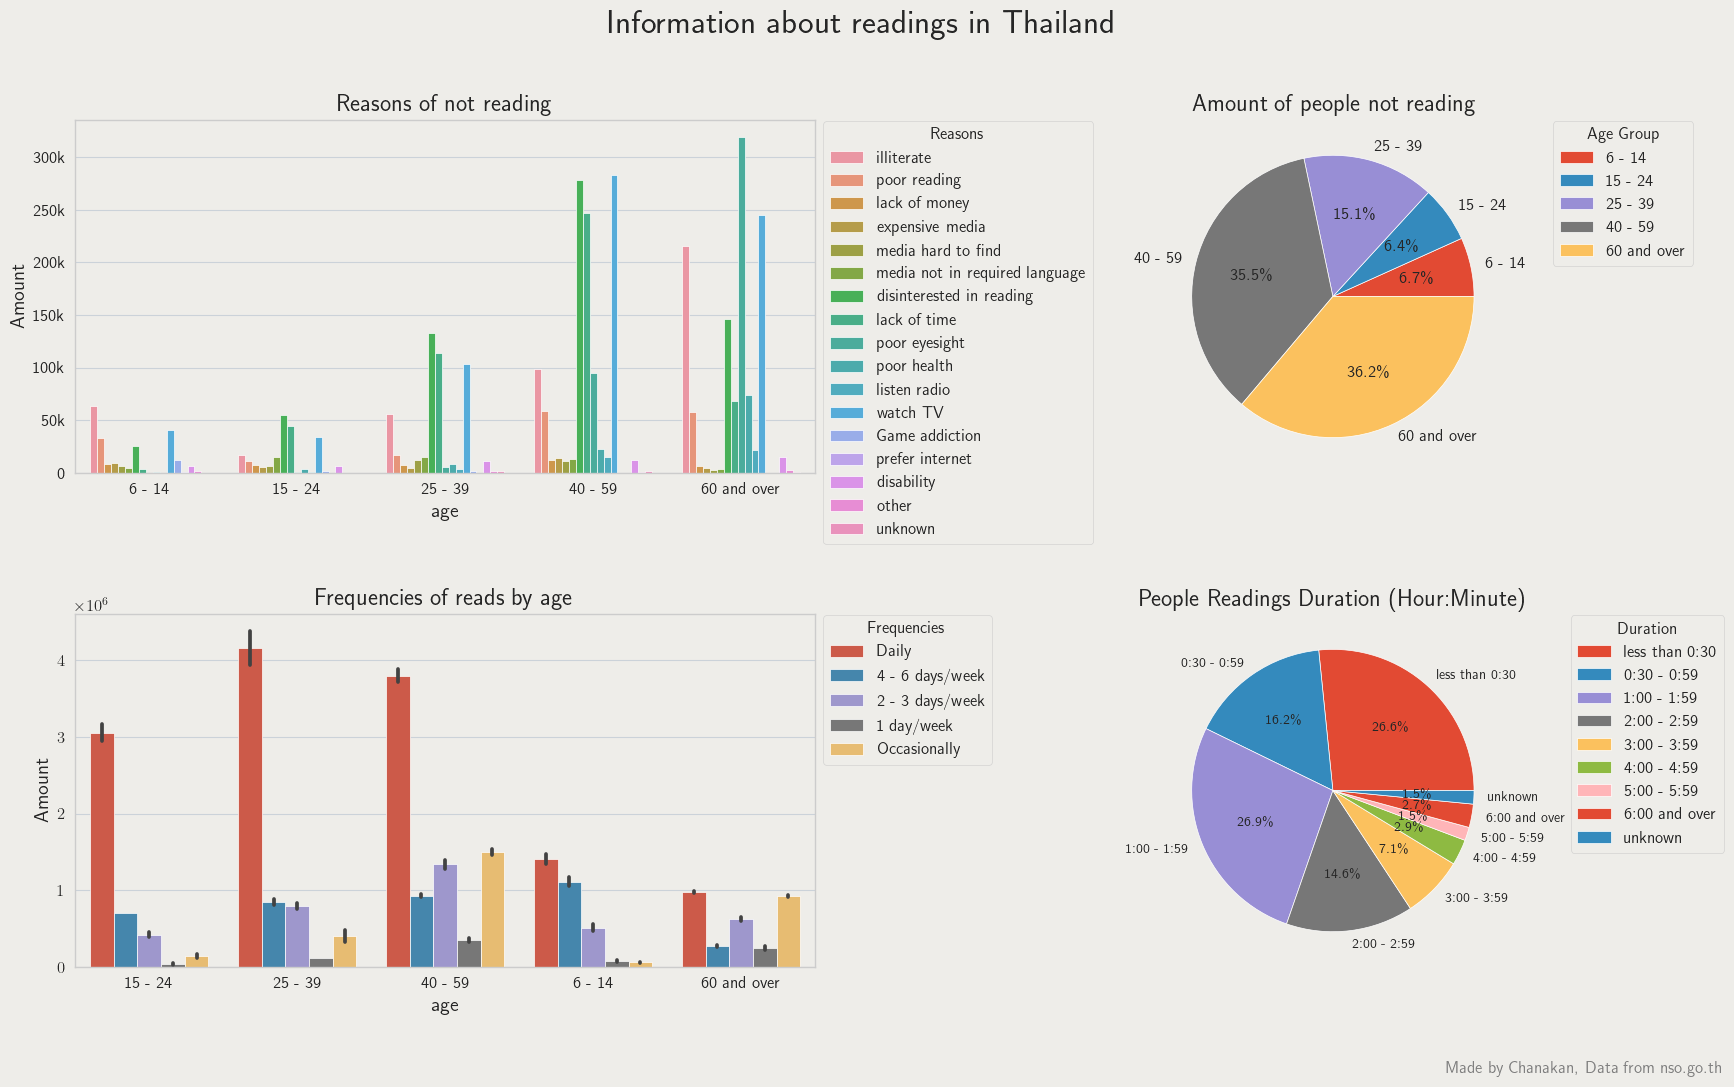

In [320]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 11))

fig.suptitle('Information about readings in Thailand', fontsize=24)

plt.subplots_adjust(hspace=0.4)

sns.barplot(data=not_read,x='age', y='amount', hue='reason', ax=axes[0, 0])
groupby_age.plot(kind='pie', y='amount', labels=groupby_age['age'], autopct=autopct_format, ax=axes[0, 1])
sns.barplot(data=melted_df,x='age', y='read_amount', hue='frequencies', ax=axes[1, 0])
read_duration.plot(kind='pie', y='male_read', labels=read_duration['duration'], autopct=autopct_format,textprops={'fontsize': 10}, ax=axes[1,1])

axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

axes[0, 0].set_title('Reasons of not reading')
axes[0, 0].set_ylabel('Amount')
axes[0, 0].legend(title="Reasons", bbox_to_anchor=(1, 1.02), loc='upper left')

axes[0, 1].set_title('Amount of people not reading')
axes[0, 1].set_ylabel('')
axes[0, 1].legend(title="Age Group", bbox_to_anchor=(1.1, 1.02), loc='upper left')

axes[1, 0].set_title('Frequencies of reads by age')
axes[1, 0].set_ylabel('Amount')
axes[1, 0].legend(title='Frequencies', bbox_to_anchor=(1, 1.02), loc='upper left')

axes[1, 1].set_title('People Readings Duration (Hour:Minute)')
axes[1, 1].set_ylabel('')
axes[1, 1].legend(title="Duration", bbox_to_anchor=(1.15, 1.02), loc='upper left')

fig.text(0.91, 0.01, "Made by Chanakan, Data from nso.go.th", fontsize=12, color='gray', ha='right', va='bottom')

plt.savefig('information-reports.png', dpi=300, bbox_inches='tight')